# Iniciando processo

## Iniciando as bibliotecas

In [58]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Carregando e organizado os dados

In [59]:
train = pd.read_csv('train_limpo_2.csv', index_col=0)

In [60]:
train.head()

,Survived,Pclass,Parch,male,Q,S,Elderly,Young,Miss,Mr,Mrs,Outros,F2,F3,F4,FamilySize,IsAlone
0,0,3,0,1,0,1,0,0,0,1,0,0,0,0,0,2,0
1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,2,0
2,1,3,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1
3,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,2,0
4,0,3,0,1,0,1,0,0,0,1,0,0,1,0,0,1,1


In [61]:
X_train_of = train.drop(['Survived'], axis=1)
y_train_of = train['Survived']

In [62]:
test = pd.read_csv('test_limpo_2.csv', index_col=0)
PassengerId = test['PassengerId']
X_test_of = test.drop('PassengerId',axis=1)

In [63]:
X_test_of.head()

,Pclass,Parch,male,Q,S,Elderly,Young,Miss,Mr,Mrs,Outros,F2,F3,F4,FamilySize,IsAlone
0,3,0,1,1,0,0,0,0,1,0,0,0,0,0,1,1
1,3,0,0,0,1,0,0,0,0,1,0,0,0,0,2,0
2,2,0,1,1,0,0,0,0,1,0,0,1,0,0,1,1
3,3,0,1,0,1,0,0,0,1,0,0,1,0,0,1,1
4,3,1,0,0,1,0,0,0,0,1,0,1,0,0,3,0


In [64]:
X_test_of.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Pclass      418 non-null    int64
 1   Parch       418 non-null    int64
 2   male        418 non-null    int64
 3   Q           418 non-null    int64
 4   S           418 non-null    int64
 5   Elderly     418 non-null    int64
 6   Young       418 non-null    int64
 7   Miss        418 non-null    int64
 8   Mr          418 non-null    int64
 9   Mrs         418 non-null    int64
 10  Outros      418 non-null    int64
 11  F2          418 non-null    int64
 12  F3          418 non-null    int64
 13  F4          418 non-null    int64
 14  FamilySize  418 non-null    int64
 15  IsAlone     418 non-null    int64
dtypes: int64(16)
memory usage: 55.5 KB


# Selecionando modelos

In [65]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import RandomizedSearchCV

## Tentativa 1

In [66]:
model1=RandomForestClassifier()
model2=XGBClassifier()
model3=LogisticRegression()
model4=SVC(kernel='poly',gamma=1,C=0.1)
model5=KNeighborsClassifier(n_neighbors=23,leaf_size=23,p=1)

model=[model1,model2,model3,model4,model5]

In [67]:
c=0
for m in model:
    c+=1
    m.fit(X_train_of,y_train_of)
    accur=round(m.score(X_train_of,y_train_of)*100,2)
    print('Model',c)
    print('accuracy =',accur)

Model 1
accuracy = 87.32
Model 2
accuracy = 87.09
Model 3
accuracy = 82.83
Model 4
accuracy = 86.53
Model 5
accuracy = 82.83


## Tentativa 2

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X_train_of,y_train_of,
                                                    test_size=0.15,
                                                    stratify=y_train_of)

In [70]:
error_rate = []

# Will take some time
for i in range(1,150):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

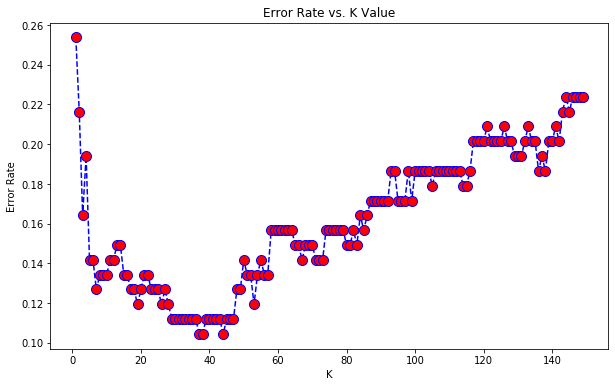

In [71]:
plt.figure(figsize=(10,6))
plt.plot(range(1,150),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [72]:
model1=RandomForestClassifier()
model2=XGBClassifier()
model3=LogisticRegression()
model4=SVC(kernel='poly',gamma=1,C=0.1)
model5=KNeighborsClassifier(n_neighbors=10)

model=[model1,model2,model3,model4,model5]

In [73]:
c=0
for m in model:
    c+=1
    m.fit(X_train_of,y_train_of)
    accur=round(m.score(X_train_of,y_train_of)*100,2)
    print('Model',c)
    print('accuracy =',accur)

Model 1
accuracy = 87.32
Model 2
accuracy = 87.09
Model 3
accuracy = 82.83
Model 4
accuracy = 86.53
Model 5
accuracy = 83.84


# RandomForestClassifier

In [75]:
param_grid={'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt', 'log2'],
 'min_samples_leaf': [1, 2, 4, 6, 8],
 'min_samples_split': [2, 5, 10, 15],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
grid = RandomizedSearchCV(RandomForestClassifier(), param_grid, refit = True, verbose = 3) 
grid.fit(X_train_of, y_train_of)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1200, min_samples_split=15, min_samples_leaf=8, max_features=log2, max_depth=10, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1200, min_samples_split=15, min_samples_leaf=8, max_features=log2, max_depth=10, bootstrap=True, score=0.827, total=   4.6s
[CV] n_estimators=1200, min_samples_split=15, min_samples_leaf=8, max_features=log2, max_depth=10, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.6s remaining:    0.0s


[CV]  n_estimators=1200, min_samples_split=15, min_samples_leaf=8, max_features=log2, max_depth=10, bootstrap=True, score=0.820, total=   4.1s
[CV] n_estimators=1200, min_samples_split=15, min_samples_leaf=8, max_features=log2, max_depth=10, bootstrap=True 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    8.7s remaining:    0.0s


[CV]  n_estimators=1200, min_samples_split=15, min_samples_leaf=8, max_features=log2, max_depth=10, bootstrap=True, score=0.826, total=   4.0s
[CV] n_estimators=1200, min_samples_split=15, min_samples_leaf=8, max_features=log2, max_depth=10, bootstrap=True 
[CV]  n_estimators=1200, min_samples_split=15, min_samples_leaf=8, max_features=log2, max_depth=10, bootstrap=True, score=0.792, total=   3.9s
[CV] n_estimators=1200, min_samples_split=15, min_samples_leaf=8, max_features=log2, max_depth=10, bootstrap=True 
[CV]  n_estimators=1200, min_samples_split=15, min_samples_leaf=8, max_features=log2, max_depth=10, bootstrap=True, score=0.848, total=   4.3s
[CV] n_estimators=1400, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=60, bootstrap=True 
[CV]  n_estimators=1400, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=60, bootstrap=True, score=0.838, total=   5.4s
[CV] n_estimators=1400, min_samples_split=10, min_samples_leaf=1, max_features=auto

[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=90, bootstrap=True, score=0.843, total=   2.3s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=30, bootstrap=False 
[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=30, bootstrap=False, score=0.827, total=   2.0s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=30, bootstrap=False 
[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=30, bootstrap=False, score=0.820, total=   2.0s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=30, bootstrap=False 
[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=30, bootstrap=False, score=0.831, total=   1.8s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_dep

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.3min finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
            

In [76]:
grid.best_params_

{'n_estimators': 1200,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 20,
 'bootstrap': True}

In [135]:
model = RandomForestClassifier(n_estimators=1200,
                               min_samples_split=10,
                               min_samples_leaf=4,
                               max_features='auto',
                               max_depth=20,
                               bootstrap= True)
model.fit(X_train_of, y_train_of)
y_pred = model.predict(X_test_of)
y_pred = pd.Series(y_pred)
accur = round(model.score(X_train_of, y_train_of)*100, 2)
accur

84.62

In [136]:
output = pd.DataFrame({'PassengerId': PassengerId, 'Survived': y_pred})

In [137]:
output.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [138]:
output = pd.DataFrame({'PassengerId': PassengerId, 'Survived': y_pred})

In [139]:
output['Survived'].value_counts()

0    265
1    153
Name: Survived, dtype: int64

In [81]:
output.to_csv('my_submission_derick.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [82]:
output.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 9.8 KB


# Rede Neural - ANN

In [83]:
import tensorflow as tf

In [84]:
print(tf.__version__)
print('Num GPUs Available: ', len(tf.config.list_physical_devices('GPU')))
print(tf.config.list_physical_devices())
print(tf.config.get_visible_devices())
print('is_build_with_cuda:', tf.test.is_built_with_cuda())
print('is_build_with_gpu_support:', tf.test.is_built_with_gpu_support())

2.2.0
Num GPUs Available:  1
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU')]
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
is_build_with_cuda: True
is_build_with_gpu_support: True


In [85]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [86]:
X_train_of.shape

(891, 16)

In [173]:
model = Sequential()
model.add(Dense(16, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))

#BINARY CLASSIFICATION
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics = ['accuracy'])

In [174]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [175]:
neural = model.fit(X_train_of.values, y_train_of.values,
          epochs=600, 
          validation_split=0.2,
          callbacks=[early_stop])

Epoch 1/600
23/23 [==============================] - 1s 28ms/step - loss: 0.6337 - accuracy: 0.6433 - val_loss: 0.5805 - val_accuracy: 0.6816
Epoch 2/600
23/23 [==============================] - 0s 16ms/step - loss: 0.5999 - accuracy: 0.6559 - val_loss: 0.5378 - val_accuracy: 0.7374
Epoch 3/600
23/23 [==============================] - 0s 14ms/step - loss: 0.5654 - accuracy: 0.7219 - val_loss: 0.5066 - val_accuracy: 0.7654
Epoch 4/600
23/23 [==============================] - 0s 12ms/step - loss: 0.5283 - accuracy: 0.7472 - val_loss: 0.4693 - val_accuracy: 0.7765
Epoch 5/600
23/23 [==============================] - 0s 14ms/step - loss: 0.4926 - accuracy: 0.7837 - val_loss: 0.4413 - val_accuracy: 0.7989
Epoch 6/600
23/23 [==============================] - 0s 13ms/step - loss: 0.4700 - accuracy: 0.7879 - val_loss: 0.4231 - val_accuracy: 0.8156
Epoch 7/600
23/23 [==============================] - 0s 15ms/step - loss: 0.4587 - accuracy: 0.8020 - val_loss: 0.4127 - val_accuracy: 0.8156
Epoch 

23/23 [==============================] - 0s 15ms/step - loss: 0.3776 - accuracy: 0.8343 - val_loss: 0.3402 - val_accuracy: 0.8659
Epoch 59/600
23/23 [==============================] - 0s 12ms/step - loss: 0.3759 - accuracy: 0.8413 - val_loss: 0.3418 - val_accuracy: 0.8715
Epoch 60/600
23/23 [==============================] - 0s 16ms/step - loss: 0.3793 - accuracy: 0.8441 - val_loss: 0.3388 - val_accuracy: 0.8659
Epoch 61/600
23/23 [==============================] - 0s 13ms/step - loss: 0.3761 - accuracy: 0.8315 - val_loss: 0.3422 - val_accuracy: 0.8771
Epoch 62/600
23/23 [==============================] - 0s 12ms/step - loss: 0.3762 - accuracy: 0.8413 - val_loss: 0.3483 - val_accuracy: 0.8827
Epoch 63/600
23/23 [==============================] - 0s 13ms/step - loss: 0.3722 - accuracy: 0.8413 - val_loss: 0.3396 - val_accuracy: 0.8547
Epoch 64/600
23/23 [==============================] - 0s 14ms/step - loss: 0.3785 - accuracy: 0.8371 - val_loss: 0.3408 - val_accuracy: 0.8547
Epoch 65/600

0.8441011309623718

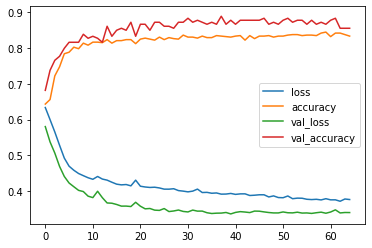

In [176]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()
pd.Series(neural.history['accuracy']).max()

In [201]:
y_pred = (model.predict(X_test_of.values) > 0.5).astype("int32")
y_pred = y_pred.reshape((418,))

In [202]:
y_pred.shape

(418,)

In [203]:
y_pred = pd.Series(y_pred)

In [204]:
output = pd.DataFrame({'PassengerId': PassengerId, 'Survived': y_pred})
output['Survived'].value_counts()

0    281
1    137
Name: Survived, dtype: int64

In [205]:
output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [206]:
output.to_csv('my_submission_derick_ANN.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
